In [1]:
from PIL import Image, ImageEnhance, ImageMath, ImageOps
import math
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx
import matplotlib.patches as mpatches
import numpy as np
import pandas as pd
import pickle
from pathlib import Path
import glob
import re

In [2]:
# * START OF USER INPUTS
# Working directory, where all the files are located
working_dir = r'/home/vivek/Tobias_Group/Piezo1/Alans RIP Talk ColorCodedOverlay/AL55_C3'

# Video name for plot title and output plot
analyzedFileName = "Alan's RIP Talk"

# DIC .tiff file name
DIC_tif_name = 'AL_55_2020-06-29-TIRFM_Diff_tdt-MEFs_C_dic_MMStack_Pos0.ome.tif'

# Which image in the DIC .tiff stack, first image is indexed as 0, second is 1, etc.
stackPosition = 2

# hdf5 formated compressed dataframe
input_predictedTracks_file_name = 'Alans_RIP_Talk_37Tracks_predClasses_20NOV2020.h5'  #NOT DONE

# Automatically name and save the plot in the working directory
autoSavePlot = True

# * END OF USER INPUTS

       Frame                     X                     Y  ID  PredictedClass
0          0  179.0552769981564438  509.4485428168828207   0               1
1          1  179.3988951208058040  509.6551922255048339   0               1
2          2  179.2601396659924262  509.3379477439030438   0               1
3          3  179.0800745309047102  509.5948592332993030   0               1
4          4  179.2525183211384672  509.5942920957093065   0               1
...      ...                   ...                   ...  ..             ...
12262    254  666.4075567720065010  535.7738840552696047  36               1
12263    255  666.5031675331034648  535.4487806422033600  36               1
12265    257  666.5644068672485218  535.5980759479716653  36               1
12266    258  666.3242815208204775  536.0003817509436885  36               1
12268    260  666.4719858615055728  536.5192246083677219  36               1

[12130 rows x 5 columns]
I;16


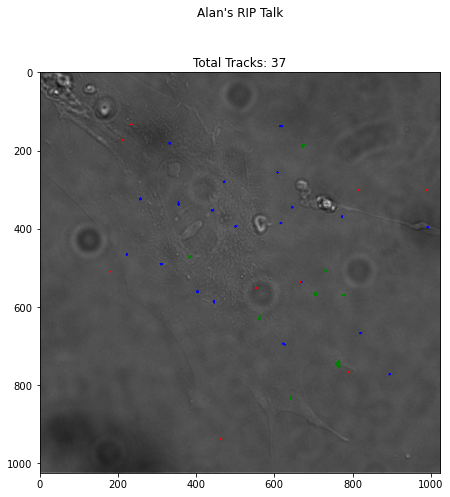

In [4]:
# Import the pickled file as a dataframe
tempDataFrame = pd.read_hdf((Path(working_dir) / input_predictedTracks_file_name))
print(tempDataFrame)

# Set the precision of float values to 16 decimals
pd.set_option('display.precision',16)

regex = re.compile(r'\d+')

# Background DIC .tiff image with appropriate slice selected
bg_DIC_img = os.path.join(working_dir, DIC_tif_name)
# Load the tiff stack
imStack = Image.open(bg_DIC_img)
imStack.load()

# Extract the dic frame
imStack.seek(stackPosition)
imDicFrame = imStack.copy()

enhanced_im = imDicFrame

img_dic = enhanced_im
print(img_dic.mode)
# img_dic = np.flipud(enhanced_im)

# Set up the plot with the background image
# Plot tracks on TIRFM image
subplot_kw = dict(xlim=(0, 1024), ylim=(1024, 0), autoscale_on=False)
fig, axes = plt.subplots(1, 1, subplot_kw=subplot_kw, figsize=(10, 7))
# Need a brighter image? find out the min max values via fiji by adjusting the brightness/contrast and using 'set' to update the
# values, then use those as the inputs for vmin and vmax below, this will scale the colormap to the values of the image. 
imgplot1 = axes.imshow(img_dic, cmap=plt.get_cmap('gray'))

# print rg of a track index
# print(float(RgDf_input[RgDf_input[0] == '498577'][1]))

# Plot the tracks
trackID_list = list(tempDataFrame.ID.unique())

for trackID in trackID_list:
    indivTrack_df = tempDataFrame.loc[tempDataFrame['ID'] == trackID, ['X', 'Y', 'PredictedClass']]
    indivTrackClass = int(indivTrack_df.PredictedClass.unique())
    if indivTrackClass == 0:
        colorValue = 'green'
    if indivTrackClass == 1:
        colorValue = 'red'
    if indivTrackClass == 2:
        colorValue = 'blue'
    plt.plot(indivTrack_df.X, indivTrack_df.Y, color=colorValue, linewidth=1)

totalTracks = len(trackID_list)
plt.suptitle(f'{analyzedFileName}')
plt.title(f'Total Tracks: {totalTracks}')


fig.tight_layout(rect=[0, 0, 1, .95])
# if autoSavePlot:
#     plt.savefig(working_dir + analyzedFileName + '_RgDf-Overlay.png', bbox_inches='tight')
plt.show()